In [1]:
from random import randint

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl

In [4]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [5]:
%matplotlib inline

In [6]:
import pandas as pd

In [7]:
DATA = {'age': [{'name': '<15岁', 'square': 20, 'line': 20},
                {'name': '15-29岁', 'square': 43, 'line': 25},
                {'name': '30-44岁', 'square': 36, 'line': 28},
                {'name': '45-59岁', 'square': 49, 'line': 65},
                {'name': '59>岁', 'square': 96, 'line': 35}],
        'job': [{'name': '学生', 'square': 17, 'line': 56},
                {'name': '职员', 'square': 38, 'line': 43},
                {'name': '自由职业', 'square': 44, 'line': 20},
                {'name': '无业', 'square': 17, 'line': 24},
                {'name': '其他', 'square': 41, 'line': 16}],
        'join_time': [{'name': '小于1年', 'line': 46, 'square': 22},
                      {'name': '1-3年', 'line': 62, 'square': 72},
                      {'name': '3-5年', 'line': 41, 'square': 52},
                      {'name': '大于5年', 'line': 96, 'square': 128}],
        'once_time': [{'name': '小于45分钟', 'square': 67, 'line': 19},
                      {'name': '45--60分钟', 'square': 46, 'line': 51},
                      {'name': '60--90分钟', 'square': 35, 'line': 43},
                      {'name': '120分钟', 'square': 48, 'line': 19},
                      {'name': '大于120分钟', 'square': 64, 'line': 27}],
        'times_of_weak': [{'name': '每天多次', 'square': 16, 'line': 48},
                          {'name': '每天1次', 'square': 48, 'line': 20},
                          {'name': '每周4-5', 'square': 41, 'line': 33},
                          {'name': '每周2-3', 'square': 24, 'line': 44},
                          {'name': '每周1次', 'square': 80, 'line': 48},
                          {'name': '其他', 'square': 22, 'line': 80}],
        'know_of_way': [{'name': '书刊,杂志', 'square': 6, 'line': 0},
                        {'name': '媒体(互联网, 手机)', 'square': 35, 'line': 23},
                        {'name': '朋友介绍', 'square': 64, 'line': 46},
                        {'name': '亲身参与培训, 比赛', 'square': 45, 'line': 81}],
        'join_of_way': [{'name': '视频学习', 'square': 33, 'line': 23},
                        {'name': '群众组织', 'square': 59, 'line': 27},
                        {'name': '参与专门的培训', 'square': 38, 'line': 69},
                        {'name': '参与各级比赛', 'square': 20, 'line': 41}],
        'liking_degree': [
            {'name': '非常喜欢', 'square': 83, 'line': 63},
            {'name': '比较喜欢', 'square': 56, 'line': 54},
            {'name': '一般', 'square': 11, 'line': 31},
            {'name': '不太喜欢', 'square': 0, 'line': 2},
            {'name': '非常不喜欢', 'square': 0, 'line': 0},
        ],
        'internal_power': [
            {'name': '强身健体', 'square': 115 , 'line': 115},
            {'name': '拓展朋友圈', 'square': 110 , 'line': 110},
            {'name': '消磨时间', 'square': 76 , 'line': 76},
            {'name': '个人爱好', 'square': 132 , 'line': 132},
            {'name': '预防疾病', 'square': 65 , 'line': 65},
            {'name': '提升气质', 'square': 52 , 'line': 52},
            {'name': '参加比赛', 'square': 128 , 'line': 128},
            {'name': '改善体态', 'square': 46 , 'line': 46},
            {'name': '辅助治疗', 'square': 16 , 'line': 16}],
        'average_consumption': [
            {'name': "<200", 'square': 63, 'line': 25},
            {'name': "200-400", 'square': 43, 'line': 41},
            {'name': "400-600", 'square': 49, 'line': 28},
            {'name': "600-800", 'square': 28, 'line': 10},
            {'name': ">=400", 'square': 5, 'line': 8}
        ],
        'consumption_content':[
            {'name': "服饰、音响设备费用", 'square': 62, 'line': 52},
            {'name': "培训、比赛报名费用", 'square': 33, 'line': 29},
            {'name': "团队集体娱乐活动费用", 'square': 18, 'line': 38},
            {'name': "学习、比赛的食宿及交通费用", 'square': 47, 'line': 21}
        ],
        'economic_source': [
            {'name': '自费','square': 59, 'line': 49},
            {'name': '公费', 'square': 32, 'line': 53},
            {'name': '部分公费', 'square': 56, 'line': 46},
            {'name': '自费', 'square': 3, 'line': 2},
        ]
       }

In [8]:
columnes = ['年龄区间', '职业','参与年限', '单次时长', '每周频次','了解途径', '参与途径', '内在动力', '平均消费/月', '消费内容', '经费来源']

In [9]:
def get_data_name(key, index):
    return DATA[key][index]['name']

In [10]:
from collections import defaultdict
default_dict = defaultdict(list)

In [11]:
def count_decrease(key, index, type):
    print(key, index)
    item = DATA[key][index]
    item[type] = item[type] -1
    if item[type] == 0:
        default_dict[key].append(index)
    DATA[key][index] = item

In [12]:
def get_random(index, last, key):
    number = randint(index, last - 1)
    cont_list =  default_dict.get(key)
    if not cont_list:
        cont_list = []
    if len(cont_list) == last:
        return number
    if number in cont_list:
        return get_random(index, last, key)
    else:
        return number

In [13]:
def get_check_number(z_list):
    number = randint(0,8)
#     if number == len(z_list) -1:
#         return number
    if number in z_list:
        return get_check_number(z_list)
    else:
        return number

In [14]:
def get_data(donce_type='line'):
    result = []
    for x in range(1, 161):
        result_list = []
        for key in DATA.keys():
            random_num = get_random(0, len(DATA[key]), key)
            count_decrease(key, random_num, donce_type)
            if key == "internal_power":
                power_list = []
                power_number = randint(1, 6)
                z_list = []
                for z in range(power_number):
                    z_number = get_check_number(z_list)
                    z_list.append(z_number)
                    power_list.append(get_data_name(key, z_number))
                name = ','.join(power_list)
            else:
                name = get_data_name(key, random_num)
            result_list.append(name)
        result.append(result_list)
    return result

In [15]:
line_data = get_data(donce_type='line')

age 0
job 2
join_time 0
once_time 1
times_of_weak 3
know_of_way 3
join_of_way 1
liking_degree 1
internal_power 3
average_consumption 1
consumption_content 1
economic_source 3
age 3
job 0
join_time 2
once_time 0
times_of_weak 5
know_of_way 1
join_of_way 1
liking_degree 1
internal_power 4
average_consumption 2
consumption_content 0
economic_source 0
age 1
job 1
join_time 1
once_time 1
times_of_weak 3
know_of_way 1
join_of_way 3
liking_degree 3
internal_power 4
average_consumption 2
consumption_content 3
economic_source 1
age 4
job 2
join_time 1
once_time 3
times_of_weak 0
know_of_way 0
join_of_way 3
liking_degree 0
internal_power 4
average_consumption 1
consumption_content 1
economic_source 3
age 3
job 3
join_time 1
once_time 4
times_of_weak 0
know_of_way 1
join_of_way 0
liking_degree 0
internal_power 3
average_consumption 2
consumption_content 1
economic_source 0
age 4
job 1
join_time 1
once_time 4
times_of_weak 3
know_of_way 0
join_of_way 0
liking_degree 1
internal_power 2
average_cons

times_of_weak 1
know_of_way 3
join_of_way 3
liking_degree 0
internal_power 4
average_consumption 1
consumption_content 2
economic_source 2
age 3
job 0
join_time 0
once_time 3
times_of_weak 2
know_of_way 2
join_of_way 3
liking_degree 4
internal_power 0
average_consumption 1
consumption_content 1
economic_source 2
age 3
job 0
join_time 2
once_time 1
times_of_weak 4
know_of_way 0
join_of_way 2
liking_degree 1
internal_power 4
average_consumption 1
consumption_content 1
economic_source 2
age 3
job 0
join_time 3
once_time 2
times_of_weak 0
know_of_way 2
join_of_way 2
liking_degree 2
internal_power 8
average_consumption 2
consumption_content 2
economic_source 0
age 0
job 1
join_time 1
once_time 4
times_of_weak 5
know_of_way 0
join_of_way 3
liking_degree 2
internal_power 2
average_consumption 1
consumption_content 2
economic_source 2
age 4
job 0
join_time 1
once_time 4
times_of_weak 5
know_of_way 0
join_of_way 3
liking_degree 0
internal_power 5
average_consumption 1
consumption_content 1
econ

In [16]:
default_dict = defaultdict(list)
square_data = get_data(donce_type='square')

age 2
job 4
join_time 2
once_time 2
times_of_weak 1
know_of_way 3
join_of_way 0
liking_degree 4
internal_power 5
average_consumption 0
consumption_content 2
economic_source 3
age 1
job 3
join_time 2
once_time 4
times_of_weak 2
know_of_way 0
join_of_way 1
liking_degree 1
internal_power 1
average_consumption 3
consumption_content 2
economic_source 3
age 1
job 1
join_time 0
once_time 4
times_of_weak 4
know_of_way 0
join_of_way 1
liking_degree 2
internal_power 7
average_consumption 2
consumption_content 0
economic_source 0
age 3
job 4
join_time 3
once_time 3
times_of_weak 0
know_of_way 0
join_of_way 2
liking_degree 3
internal_power 8
average_consumption 1
consumption_content 3
economic_source 0
age 4
job 2
join_time 0
once_time 2
times_of_weak 5
know_of_way 1
join_of_way 3
liking_degree 1
internal_power 0
average_consumption 3
consumption_content 3
economic_source 1
age 4
job 3
join_time 2
once_time 0
times_of_weak 1
know_of_way 0
join_of_way 1
liking_degree 1
internal_power 6
average_cons

consumption_content 0
economic_source 2
age 1
job 2
join_time 3
once_time 0
times_of_weak 1
know_of_way 1
join_of_way 3
liking_degree 0
internal_power 3
average_consumption 0
consumption_content 1
economic_source 2
age 2
job 1
join_time 2
once_time 4
times_of_weak 4
know_of_way 3
join_of_way 1
liking_degree 1
internal_power 5
average_consumption 3
consumption_content 0
economic_source 2
age 3
job 1
join_time 2
once_time 0
times_of_weak 2
know_of_way 2
join_of_way 2
liking_degree 4
internal_power 2
average_consumption 1
consumption_content 1
economic_source 0
age 4
job 2
join_time 3
once_time 0
times_of_weak 4
know_of_way 2
join_of_way 1
liking_degree 1
internal_power 7
average_consumption 2
consumption_content 0
economic_source 0
age 3
job 1
join_time 3
once_time 1
times_of_weak 5
know_of_way 2
join_of_way 0
liking_degree 0
internal_power 0
average_consumption 0
consumption_content 1
economic_source 2
age 4
job 2
join_time 2
once_time 2
times_of_weak 5
know_of_way 1
join_of_way 0
likin

In [17]:
line_pd = pd.DataFrame(line_data, columns=DATA.keys())

In [18]:
square_pd = pd.DataFrame(square_data, columns=DATA.keys())

In [19]:
line_pd.head()

,age,job,join_time,once_time,times_of_weak,know_of_way,join_of_way,liking_degree,internal_power,average_consumption,consumption_content,economic_source
0,<15岁,自由职业,小于1年,45--60分钟,每周2-3,"亲身参与培训, 比赛",群众组织,比较喜欢,"辅助治疗,改善体态,拓展朋友圈",200-400,培训、比赛报名费用,自费
1,45-59岁,学生,3-5年,小于45分钟,其他,"媒体(互联网, 手机)",群众组织,比较喜欢,"强身健体,提升气质,辅助治疗,预防疾病,消磨时间",400-600,服饰、音响设备费用,自费
2,15-29岁,职员,1-3年,45--60分钟,每周2-3,"媒体(互联网, 手机)",参与各级比赛,不太喜欢,"消磨时间,参加比赛,改善体态,强身健体",400-600,学习、比赛的食宿及交通费用,公费
3,59>岁,自由职业,1-3年,120分钟,每天多次,"书刊,杂志",参与各级比赛,非常喜欢,"辅助治疗,强身健体,参加比赛,预防疾病,个人爱好,消磨时间",200-400,培训、比赛报名费用,自费
4,45-59岁,无业,1-3年,大于120分钟,每天多次,"媒体(互联网, 手机)",视频学习,非常喜欢,"提升气质,个人爱好,强身健体,参加比赛,预防疾病,辅助治疗",400-600,培训、比赛报名费用,自费


In [20]:
square_pd.head()

,age,job,join_time,once_time,times_of_weak,know_of_way,join_of_way,liking_degree,internal_power,average_consumption,consumption_content,economic_source
0,30-44岁,其他,3-5年,60--90分钟,每天1次,"亲身参与培训, 比赛",视频学习,非常不喜欢,"预防疾病,改善体态,辅助治疗,提升气质",<200,团队集体娱乐活动费用,自费
1,15-29岁,无业,3-5年,大于120分钟,每周4-5,"书刊,杂志",群众组织,比较喜欢,"强身健体,个人爱好",600-800,团队集体娱乐活动费用,自费
2,15-29岁,职员,小于1年,大于120分钟,每周1次,"书刊,杂志",群众组织,一般,"预防疾病,强身健体,辅助治疗,拓展朋友圈,消磨时间,改善体态",400-600,服饰、音响设备费用,自费
3,45-59岁,其他,大于5年,120分钟,每天多次,"书刊,杂志",参与专门的培训,不太喜欢,"参加比赛,改善体态,强身健体,提升气质,预防疾病,拓展朋友圈",200-400,学习、比赛的食宿及交通费用,自费
4,59>岁,自由职业,小于1年,60--90分钟,其他,"媒体(互联网, 手机)",参与各级比赛,比较喜欢,"个人爱好,改善体态,预防疾病,提升气质,辅助治疗",600-800,学习、比赛的食宿及交通费用,公费


In [21]:
df =  pd.concat([line_pd, square_pd], keys=['line', 'square'])

In [22]:
df

age   job join_time once_time times_of_weak  know_of_way  \
line   0      <15岁  自由职业      小于1年  45--60分钟         每周2-3   亲身参与培训, 比赛   
       1    45-59岁    学生      3-5年    小于45分钟            其他  媒体(互联网, 手机)   
       2    15-29岁    职员      1-3年  45--60分钟         每周2-3  媒体(互联网, 手机)   
       3      59>岁  自由职业      1-3年     120分钟          每天多次        书刊,杂志   
       4    45-59岁    无业      1-3年   大于120分钟          每天多次  媒体(互联网, 手机)   
       5      59>岁    职员      1-3年   大于120分钟         每周2-3        书刊,杂志   
       6    30-44岁    职员      大于5年  45--60分钟          每周1次        书刊,杂志   
       7    15-29岁    职员      大于5年  45--60分钟            其他   亲身参与培训, 比赛   
       8      59>岁  自由职业      3-5年    小于45分钟          每天1次   亲身参与培训, 比赛   
       9      59>岁    其他      大于5年  60--90分钟         每周2-3  媒体(互联网, 手机)   
       10   45-59岁    无业      大于5年     120分钟          每周1次        书刊,杂志   
       11     59>岁    其他      小于1年  60--90分钟            其他        书刊,杂志   
       12   30-44岁    学生      3-5年  60--90分钟            其他   亲身参与培训, 比赛   
       13   15-29岁    无业      3-5年    小于45分钟         每周4-5   亲身参与培训, 比赛   
       14     59>岁    无业      1-3年  45--60分钟          每天1次         朋友介绍   
       15     59>岁    其他      3-5年    小于45分钟            其他  媒体(互联网, 手机)   
       16     59>岁    职员      小于1年   大于120分钟         每周2-3        书刊,杂志   
       17   30-44岁    其他      3-5年     120分钟          每天1次   亲身参与培训, 比赛   
       18     <15岁    无业      大于5年  45--60分钟         每周2-3         朋友介绍   
       19     59>岁    其他      大于5年  45--60分钟            其他   亲身参与培训, 比赛   
       20   30-44岁    学生      1-3年    小于45分钟         每周4-5         朋友介绍   
       21     <15岁  自由职业      1-3年   大于120分钟          每天多次   亲身参与培训, 比赛   
       22   15-29岁    学生      大于5年   大于120分钟         每周4-5   亲身参与培训, 比赛   
       23   45-59岁    无业      大于5年     120分钟          每天多次   亲身参与培训, 比赛   
       24     59>岁    无业      1-3年  60--90分钟         每周4-5        书刊,杂志   
       25   15-29岁    其他      小于1年     120分钟          每周1次  媒体(互联网, 手机)   
       26     59>岁    职员      小于1年  60--90分钟          每周1次         朋友介绍   
       27     59>岁    职员      1-3年  45--60分钟         每周4-5        书刊,杂志   
       28   30-44岁    无业      1-3年  60--90分钟          每天多次  媒体(互联网, 手机)   
       29     59>岁    学生      小于1年  45--60分钟            其他         朋友介绍   
...            ...   ...       ...       ...           ...          ...   
square 130  45-59岁    其他      大于5年    小于45分钟          每天1次         朋友介绍   
       131  30-44岁    其他      3-5年    小于45分钟          每天1次         朋友介绍   
       132    59>岁  自由职业      大于5年  60--90分钟         每周4-5         朋友介绍   
       133  15-29岁  自由职业      3-5年   大于120分钟          每周1次         朋友介绍   
       134    59>岁    其他      大于5年    小于45分钟          每周1次         朋友介绍   
       135  15-29岁  自由职业      1-3年    小于45分钟         每周2-3         朋友介绍   
       136  30-44岁    其他      大于5年     120分钟          每周1次         朋友介绍   
       137  15-29岁  自由职业      大于5年     120分钟         每周2-3         朋友介绍   
       138  30-44岁    职员      1-3年     120分钟          每天1次         朋友介绍   
       139  30-44岁  自由职业      大于5年  60--90分钟         每周4-5         朋友介绍   
       140  45-59岁    其他      大于5年  45--60分钟          每天1次         朋友介绍   
       141  15-29岁  自由职业      大于5年  45--60分钟         每周2-3         朋友介绍   
       142  45-59岁    职员      大于5年    小于45分钟         每周4-5         朋友介绍   
       143  15-29岁  自由职业      3-5年  45--60分钟         每周4-5         朋友介绍   
       144    59>岁    职员      大于5年  60--90分钟         每周4-5         朋友介绍   
       145    59>岁    其他      3-5年     120分钟          每天1次         朋友介绍   
       146  15-29岁  自由职业      1-3年  60--90分钟          每天1次         朋友介绍   
       147    59>岁    其他      大于5年  60--90分钟         每周2-3         朋友介绍   
       148  45-59岁    职员      大于5年     120分钟          每周1次         朋友介绍   
       149  15-29岁  自由职业      1-3年   大于120分钟          每天1次         朋友介绍   
       150  45-59岁  自由职业      1-3年  60--90分钟          每天1次        书刊,杂志   
       151  30-44岁    职员      1-3年   大于1

In [23]:
df1 = df.copy()

In [24]:
def get_job_by_age(age):
    if age == "<15岁":
        return '学生'
    elif age == "59>岁":
        return ['其他', '无业'][randint(0,1)]
    elif age == "15-29岁":
        return ['学生','自由职业', '职员', '职员'][randint(0, 3)]
    elif age == "30-44岁":
        return ['其他','自由职业', '职员', '职员'][randint(0, 3)]
    elif age == "45-59岁":
        return ['无业','自由职业', '自由职业', '职员', '其他'][randint(0, 4)]

In [25]:
df1['job'] = df1['age'].map(get_job_by_age)

In [26]:
df1

age   job join_time once_time times_of_weak  know_of_way  \
line   0      <15岁    学生      小于1年  45--60分钟         每周2-3   亲身参与培训, 比赛   
       1    45-59岁  自由职业      3-5年    小于45分钟            其他  媒体(互联网, 手机)   
       2    15-29岁    职员      1-3年  45--60分钟         每周2-3  媒体(互联网, 手机)   
       3      59>岁    其他      1-3年     120分钟          每天多次        书刊,杂志   
       4    45-59岁  自由职业      1-3年   大于120分钟          每天多次  媒体(互联网, 手机)   
       5      59>岁    无业      1-3年   大于120分钟         每周2-3        书刊,杂志   
       6    30-44岁  自由职业      大于5年  45--60分钟          每周1次        书刊,杂志   
       7    15-29岁    职员      大于5年  45--60分钟            其他   亲身参与培训, 比赛   
       8      59>岁    无业      3-5年    小于45分钟          每天1次   亲身参与培训, 比赛   
       9      59>岁    无业      大于5年  60--90分钟         每周2-3  媒体(互联网, 手机)   
       10   45-59岁    职员      大于5年     120分钟          每周1次        书刊,杂志   
       11     59>岁    其他      小于1年  60--90分钟            其他        书刊,杂志   
       12   30-44岁    职员      3-5年  60--90分钟            其他   亲身参与培训, 比赛   
       13   15-29岁    职员      3-5年    小于45分钟         每周4-5   亲身参与培训, 比赛   
       14     59>岁    其他      1-3年  45--60分钟          每天1次         朋友介绍   
       15     59>岁    其他      3-5年    小于45分钟            其他  媒体(互联网, 手机)   
       16     59>岁    无业      小于1年   大于120分钟         每周2-3        书刊,杂志   
       17   30-44岁    职员      3-5年     120分钟          每天1次   亲身参与培训, 比赛   
       18     <15岁    学生      大于5年  45--60分钟         每周2-3         朋友介绍   
       19     59>岁    其他      大于5年  45--60分钟            其他   亲身参与培训, 比赛   
       20   30-44岁    其他      1-3年    小于45分钟         每周4-5         朋友介绍   
       21     <15岁    学生      1-3年   大于120分钟          每天多次   亲身参与培训, 比赛   
       22   15-29岁    学生      大于5年   大于120分钟         每周4-5   亲身参与培训, 比赛   
       23   45-59岁  自由职业      大于5年     120分钟          每天多次   亲身参与培训, 比赛   
       24     59>岁    无业      1-3年  60--90分钟         每周4-5        书刊,杂志   
       25   15-29岁  自由职业      小于1年     120分钟          每周1次  媒体(互联网, 手机)   
       26     59>岁    其他      小于1年  60--90分钟          每周1次         朋友介绍   
       27     59>岁    无业      1-3年  45--60分钟         每周4-5        书刊,杂志   
       28   30-44岁  自由职业      1-3年  60--90分钟          每天多次  媒体(互联网, 手机)   
       29     59>岁    其他      小于1年  45--60分钟            其他         朋友介绍   
...            ...   ...       ...       ...           ...          ...   
square 130  45-59岁    职员      大于5年    小于45分钟          每天1次         朋友介绍   
       131  30-44岁    其他      3-5年    小于45分钟          每天1次         朋友介绍   
       132    59>岁    无业      大于5年  60--90分钟         每周4-5         朋友介绍   
       133  15-29岁    学生      3-5年   大于120分钟          每周1次         朋友介绍   
       134    59>岁    其他      大于5年    小于45分钟          每周1次         朋友介绍   
       135  15-29岁    职员      1-3年    小于45分钟         每周2-3         朋友介绍   
       136  30-44岁  自由职业      大于5年     120分钟          每周1次         朋友介绍   
       137  15-29岁    职员      大于5年     120分钟         每周2-3         朋友介绍   
       138  30-44岁    职员      1-3年     120分钟          每天1次         朋友介绍   
       139  30-44岁    职员      大于5年  60--90分钟         每周4-5         朋友介绍   
       140  45-59岁    其他      大于5年  45--60分钟          每天1次         朋友介绍   
       141  15-29岁    学生      大于5年  45--60分钟         每周2-3         朋友介绍   
       142  45-59岁  自由职业      大于5年    小于45分钟         每周4-5         朋友介绍   
       143  15-29岁  自由职业      3-5年  45--60分钟         每周4-5         朋友介绍   
       144    59>岁    其他      大于5年  60--90分钟         每周4-5         朋友介绍   
       145    59>岁    无业      3-5年     120分钟          每天1次         朋友介绍   
       146  15-29岁    职员      1-3年  60--90分钟          每天1次         朋友介绍   
       147    59>岁    其他      大于5年  60--90分钟         每周2-3         朋友介绍   
       148  45-59岁    职员      大于5年     120分钟          每周1次         朋友介绍   
       149  15-29岁  自由职业      1-3年   大于120分钟          每天1次         朋友介绍   
       150  45-59岁    职员      1-3年  60--90分钟          每天1次        书刊,杂志   
       151  30-44岁    其他      1-3年   大于1

In [27]:
# df1.columns = columnes
# pd1.to_excel('line_dance.xls')

In [28]:
df3 = df1.copy()

In [29]:
df3 = df3.swaplevel()

In [30]:
df3.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159], ['line', 'square']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64

In [31]:
df3['types'] = list(map(lambda x: x[1], df3.index)) 

In [32]:
df3

,,age,job,join_time,once_time,times_of_weak,know_of_way,join_of_way,liking_degree,internal_power,average_consumption,consumption_content,economic_source,types
0,line,<15岁,学生,小于1年,45--60分钟,每周2-3,"亲身参与培训, 比赛",群众组织,比较喜欢,"辅助治疗,改善体态,拓展朋友圈",200-400,培训、比赛报名费用,自费,line
1,line,45-59岁,自由职业,3-5年,小于45分钟,其他,"媒体(互联网, 手机)",群众组织,比较喜欢,"强身健体,提升气质,辅助治疗,预防疾病,消磨时间",400-600,服饰、音响设备费用,自费,line
2,line,15-29岁,职员,1-3年,45--60分钟,每周2-3,"媒体(互联网, 手机)",参与各级比赛,不太喜欢,"消磨时间,参加比赛,改善体态,强身健体",400-600,学习、比赛的食宿及交通费用,公费,line
3,line,59>岁,其他,1-3年,120分钟,每天多次,"书刊,杂志",参与各级比赛,非常喜欢,"辅助治疗,强身健体,参加比赛,预防疾病,个人爱好,消磨时间",200-400,培训、比赛报名费用,自费,line
4,line,45-59岁,自由职业,1-3年,大于120分钟,每天多次,"媒体(互联网, 手机)",视频学习,非常喜欢,"提升气质,个人爱好,强身健体,参加比赛,预防疾病,辅助治疗",400-600,培训、比赛报名费用,自费,line
5,line,59>岁,无业,1-3年,大于120分钟,每周2-3,"书刊,杂志",视频学习,比较喜欢,"预防疾病,个人爱好,参加比赛",400-600,学习、比赛的食宿及交通费用,公费,line
6,line,30-44岁,自由职业,大于5年,45--60分钟,每周1次,"书刊,杂志",视频学习,不太喜欢,"参加比赛,提升气质",>=400,服饰、音响设备费用,部分公费,line
7,line,15-29岁,职员,大于5年,45--60分钟,其他,"亲身参与培训, 比赛",视频学习,一般,"拓展朋友圈,强身健体",200-400,学习、比赛的食宿及交通费用,部分公费,line
8,line,59>岁,无业,3-5年,小于45分钟,每天1次,"亲身参与培训, 比赛",视频学习,比较喜欢,"强身健体,参加比赛,提升气质,个人爱好,辅助治疗",600-800,服饰、音响设备费用,部分公费,line
9,line,59>岁,无业,大于5年,60--90分钟,每周2-3,"媒体(互联网, 手机)",群众组织,一般,"参加比赛,强身健体",600-800,服饰、音响设备费用,部分公费,line


In [33]:
df3.groupby(['types','average_consumption', 'economic_source', 'liking_degree']).count()

age  job  join_time  \
types  average_consumption economic_source liking_degree                        
line   200-400             公费              一般               1    1          1   
                                           比较喜欢             5    5          5   
                                           非常不喜欢            5    5          5   
                                           非常喜欢             6    6          6   
                           自费              一般               2    2          2   
                                           比较喜欢             4    4          4   
                                           非常不喜欢            3    3          3   
                                           非常喜欢             8    8          8   
                           部分公费            一般               6    6          6   
                                           比较喜欢             4    4          4   
                                           非常不喜欢            3    3          3   
                                           非常喜欢             6    6          6   
       400-600             公费              一般               2    2          2   
                                           不太喜欢             1    1          1   
                                           比较喜欢             6    6          6   
                                           非常不喜欢            2    2          2   
                                           非常喜欢             3    3          3   
                           自费              一般               1    1          1   
                                           比较喜欢             2    2          2   
                                           非常不喜欢            5    5          5   
                                           非常喜欢             3    3          3   
                           部分公费            一般               4    4          4   
                                           比较喜欢             2    2          2   
                                           非常不喜欢            2    2          2   
                                           非常喜欢             3    3          3   
       600-800             公费              一般               1    1          1   
                                           比较喜欢             2    2          2   
                                           非常不喜欢            1    1          1   
                                           非常喜欢             2    2          2   
                           自费              一般               3    3          3   
...                                                       ...  ...        ...   
square 600-800             公费              比较喜欢             3    3          3   
                                           非常不喜欢            1    1          1   
                                           非常喜欢             1    1          1   
                           自费              不太喜欢             3    3          3   
                                           比较喜欢             2    2          2   
                                           非常不喜欢            1    1          1   
                                           非常喜欢             1    1          1   
                           部分公费            一般               2    2          2   
                                           不太喜欢             3    3          3   
                                           比较喜欢             6    6          6   
                                           非常不喜欢            2    2          2   
                                           非常喜欢             2    2          2   
       <200                公费              一般               1    1          1   
                                           不太喜欢             1    1          1   
                                           比较喜欢             2    2          2   
                                           非常不喜欢            3    3          3   
                                           非常喜欢             1    1          1   
        

In [34]:
pd_groupby_economic =  df3.groupby(['economic_source', 'types','average_consumption'])

In [35]:
f = pd_groupby_economic.size().unstack(0)

In [36]:
pd_groupby_economic = pd_groupby_economic.size().unstack(0)

In [37]:
pd_groupby_economic.index

MultiIndex(levels=[['line', 'square'], ['200-400', '400-600', '600-800', '<200', '>=400']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['types', 'average_consumption'])

In [38]:
pd_groupby_economic.keys()

Index(['公费', '自费', '部分公费'], dtype='object', name='economic_source')

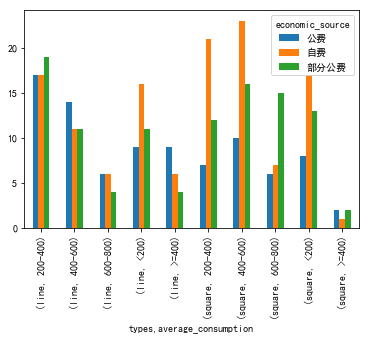

In [39]:
pd_groupby_economic.plot(kind='bar')

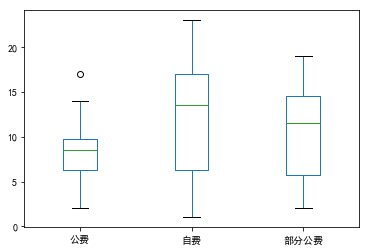

In [40]:
pd_groupby_economic.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002171EC87550>,
      dtype=object)

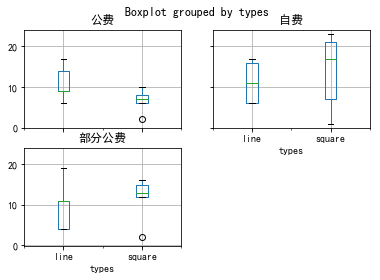

In [41]:
pd_groupby_economic.boxplot(column=['公费', '自费', '部分公费'],by='types')

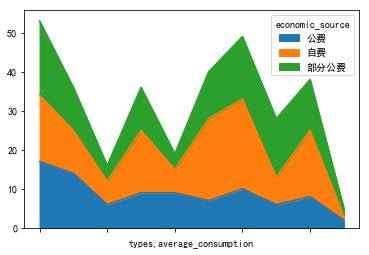

In [42]:
pd_groupby_economic.plot.area()

In [43]:
# MultiIndex(levels=[['line', 'square'], ['200-400', '400-600', '600-800', '<200', '>=400']],
#            labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
#            names=['types', 'average_consumption'])

In [44]:
f.values

array([[17, 17, 19],
       [14, 11, 11],
       [ 6,  6,  4],
       [ 9, 16, 11],
       [ 9,  6,  4],
       [ 7, 21, 12],
       [10, 23, 16],
       [ 6,  7, 15],
       [ 8, 17, 13],
       [ 2,  1,  2]], dtype=int64)

In [45]:
f.index

MultiIndex(levels=[['line', 'square'], ['200-400', '400-600', '600-800', '<200', '>=400']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['types', 'average_consumption'])

In [46]:
f.index.all

<bound method make_invalid_op.<locals>.invalid_op of MultiIndex(levels=[['line', 'square'], ['200-400', '400-600', '600-800', '<200', '>=400']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['types', 'average_consumption'])>

In [47]:
pd.DataFrame(data=f.values, index=f.index)

0   1   2
types  average_consumption            
line   200-400              17  17  19
       400-600              14  11  11
       600-800               6   6   4
       <200                  9  16  11
       >=400                 9   6   4
square 200-400               7  21  12
       400-600              10  23  16
       600-800               6   7  15
       <200                  8  17  13
       >=400                 2   1   2

In [48]:
f.values

array([[17, 17, 19],
       [14, 11, 11],
       [ 6,  6,  4],
       [ 9, 16, 11],
       [ 9,  6,  4],
       [ 7, 21, 12],
       [10, 23, 16],
       [ 6,  7, 15],
       [ 8, 17, 13],
       [ 2,  1,  2]], dtype=int64)

In [49]:
liking_degree_data = pd.DataFrame()

In [50]:
index = pd.Index([('排舞', '公费'), ('排舞', '自费'), ('排舞', '部分公费'),
       ('广场舞', '公费'), ('广场舞', '自费'), ('广场舞', '部分公费')], name=['类型', '经费来源'])

In [56]:
liking_consumption_df = pd.DataFrame(data=[[23.], [19.], [9.], [2.], [0.], [17.], [11.], [3.], [0.], [0.]] , index=f.index)

In [57]:
liking_consumption_df.columns  = ['公费']

In [58]:
liking_consumption_df

公费
types  average_consumption      
line   200-400              23.0
       400-600              19.0
       600-800               9.0
       <200                  2.0
       >=400                 0.0
square 200-400              17.0
       400-600              11.0
       600-800               3.0
       <200                  0.0
       >=400                 0.0

In [59]:
pd_groupby_liking =  df3.groupby(['types', 'liking_degree', 'economic_source'])

In [60]:
liking_degree_df =  pd_groupby_liking.size().unstack(1)

In [61]:
liking_degree_df.columns.name = '喜欢程度'

In [62]:
liking_degree_df.index.names = ['类型', '经费来源']

In [63]:
liking_degree_df.columns = ['非常喜欢', '比较喜欢', '一般喜欢', '不太喜欢', '其他'] 
liking_degree_df

非常喜欢  比较喜欢  一般喜欢  不太喜欢    其他
类型     经费来源                              
line   公费     6.0   1.0  18.0  14.0  16.0
       自费    10.0   NaN  11.0  15.0  20.0
       部分公费  15.0   1.0  12.0   7.0  14.0
square 公费     5.0   7.0  14.0   5.0   2.0
       自费     1.0  23.0  11.0  16.0  18.0
       部分公费   5.0  14.0  14.0  13.0  12.0

In [64]:
liking_degree_data = [
    [23, 19, 9, 2, 0],
    [27, 13, 8, 0, 1],
    [20, 20, 5, 1, 0],
    [17, 11, 3, 0, 0],
    [30, 27, 3, 0, 0],
    [26, 23, 5, 2, 0],
]

In [65]:
liking_degree_df = pd.DataFrame(data=liking_degree_data, index=index, columns=['非常喜欢', '比较喜欢', '一般喜欢', '不太喜欢', '其他'] )

In [66]:
liking_degree_df

非常喜欢  比较喜欢  一般喜欢  不太喜欢  其他
类型  经费来源                            
排舞  公费      23    19     9     2   0
    自费      27    13     8     0   1
    部分公费    20    20     5     1   0
广场舞 公费      17    11     3     0   0
    自费      30    27     3     0   0
    部分公费    26    23     5     2   0

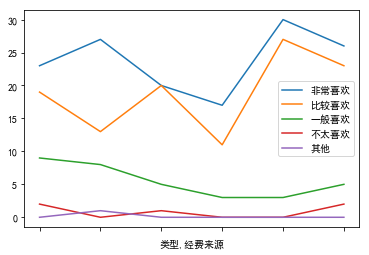

In [67]:
liking_degree_df.plot()

In [70]:
liking_line =  liking_degree_df.T['排舞'].T

In [71]:
liking_line

,非常喜欢,比较喜欢,一般喜欢,不太喜欢,其他
经费来源,,,,,
公费,23,19,9,2,0
自费,27,13,8,0,1
部分公费,20,20,5,1,0


In [72]:
liking_line.items()

<generator object DataFrame.iteritems at 0x000002171F290E08>

In [74]:
liking_square =  liking_degree_df.T['广场舞'].T

In [75]:
plt.figure(figsize=[20, 10])

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

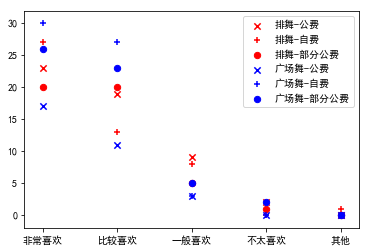

In [76]:
plt.scatter(liking_line.keys(), liking_line.values[0], marker='x', color='red', s=40, label ='排舞-公费')
plt.scatter(liking_line.keys(), liking_line.values[1], marker='+', color='red', s=40, label ='排舞-自费')
plt.scatter(liking_line.keys(), liking_line.values[2], marker='o', color='red', s=40, label ='排舞-部分公费')
plt.scatter(liking_square.keys(), liking_square.values[0], marker='x', color='blue', s=40, label ='广场舞-公费')
plt.scatter(liking_square.keys(), liking_square.values[1], marker='+', color='blue', s=40, label ='广场舞-自费')
plt.scatter(liking_square.keys(), liking_square.values[2], marker='o', color='blue', s=40, label ='广场舞-部分公费')
plt.legend(loc = 'best')
plt.savefig('费用喜欢程度散点图.png', dpi=100)

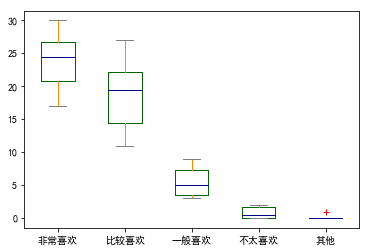

In [78]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

liking_degree_df.plot.box(color=color, sym='r+')

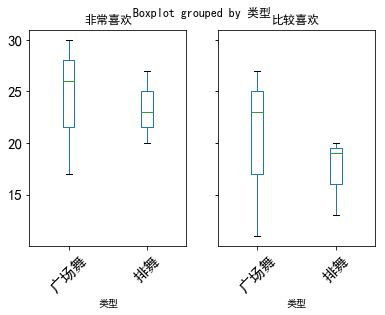

In [79]:
depree_to_png =  liking_degree_df.boxplot(column=['非常喜欢', '比较喜欢'], by='类型', grid=False,  rot=45, fontsize=15)

In [80]:
df3.groupby(['internal_power', 'age']).count()

job  join_time  once_time  \
internal_power                 age                                 
个人爱好                           15-29岁    1          1          1   
                               59>岁      1          1          1   
                               <15岁      1          1          1   
个人爱好,参加比赛,强身健体                 30-44岁    1          1          1   
个人爱好,参加比赛,强身健体,预防疾病,提升气质       <15岁      1          1          1   
个人爱好,参加比赛,拓展朋友圈,强身健体,预防疾病,提升气质 59>岁      1          1          1   
个人爱好,参加比赛,提升气质,消磨时间,预防疾病       30-44岁    1          1          1   
个人爱好,参加比赛,消磨时间,强身健体,改善体态       59>岁      1          1          1   
个人爱好,强身健体                      30-44岁    1          1          1   
个人爱好,强身健体,改善体态,预防疾病,消磨时间       59>岁      1          1          1   
个人爱好,强身健体,改善体态,预防疾病,辅助治疗,消磨时间  59>岁      1          1          1   
个人爱好,强身健体,预防疾病,辅助治疗,改善体态,参加比赛  15-29岁    1          1          1   
个人爱好,拓展朋友圈                     45-59岁    1          1          1   
个人爱好,拓展朋友圈,参加比赛,改善体态,辅助治疗,消磨时间 <15岁      1          1          1   
个人爱好,拓展朋友圈,提升气质                <15岁      1          1          1   
个人爱好,拓展朋友圈,提升气质,改善体态           30-44岁    1          1          1   
个人爱好,拓展朋友圈,消磨时间,参加比赛           <15岁      1          1          1   
个人爱好,拓展朋友圈,预防疾病,消磨时间,提升气质      45-59岁    1          1          1   
个人爱好,提升气质,参加比赛                 15-29岁    1          1          1   
个人爱好,提升气质,改善体态,参加比赛            45-59岁    1          1          1   
个人爱好,提升气质,改善体态,拓展朋友圈,参加比赛,强身健体 30-44岁    1          1          1   
个人爱好,改善体态,强身健体,预防疾病,消磨时间       45-59岁    1          1          1   
个人爱好,改善体态,拓展朋友圈,消磨时间           45-59岁    1          1          1   
个人爱好,改善体态,拓展朋友圈,消磨时间,辅助治疗,参加比赛 15-29岁    1          1          1   
个人爱好,改善体态,辅助治疗                 59>岁      1          1          1   
个人爱好,改善体态,辅助治疗,参加比赛,强身健体       59>岁      1          1          1   
个人爱好,改善体态,预防疾病,强身健体            30-44岁    1          1          1   
个人爱好,改善体态,预防疾病,提升气质,辅助治疗       59>岁      1          1          1   
个人爱好,消磨时间                      <15岁      1          1          1   
个人爱好,消磨时间,强身健体,辅助治疗,参加比赛,提升气质  <15岁      1          1          1   
...                                    ...        ...        ...   
辅助治疗,预防疾病,个人爱好                 30-44岁    1          1          1   
辅助治疗,预防疾病,个人爱好,消磨时间,参加比赛       45-59岁    1          1          1   
辅助治疗,预防疾病,参加比赛                 15-29岁    1          1          1   
预防疾病                           <15岁      2          2          2   
预防疾病,个人爱好,参加比赛                 59>岁      1          1          1   
预防疾病,个人爱好,强身健体                 45-59岁    1          1          1   
预防疾病,个人爱好,强身健体,参加比赛,改善体态,提升气质  59>岁      1          1          1   
预防疾病,个人爱好,拓展朋友圈,参加比赛,消磨时间      45-59岁    1          1          1   
预防疾病,个人爱好,提升气质,消磨时间,改善体态       30-44岁    1          1          1   
预防疾病,个人爱好,提升气质,辅助治疗            45-59岁    1          1          1   
预防疾病,个人爱好,辅助治疗,拓展朋友圈           30-44岁    1          1          1   
预防疾病,参加比赛,拓展朋友圈,个人爱好,改善体态,提升气质 45-59岁    1          1          1   
预防疾病,强身健体                      45-59岁    1          1          1   
预防疾病,强身健体,拓展朋友圈,辅助治疗,个人爱好,参加比赛 30-44岁    1          1          1   
预防疾病,强身健体,改善体态,拓展朋友圈,参加比赛      59>岁      1          1          1   
预防疾病,强身健体,辅助治疗,拓展朋友圈,消磨时间,改善体态 15-29岁    1          1          1   
预防疾病,拓展朋友圈,提升气质                15-29岁    1          1          1   
预防疾病,拓展朋友圈,消磨时间                59>岁      1          1          1   
预防疾病,拓展朋友圈,辅助治疗                <15岁      1          1          1   
预防疾病,提升气质,强身健体                 45-59岁    1          1          1   
预防疾病,提升气质,拓展朋友圈,参加比赛,个人爱好      15-29岁    1          1          1   
预防疾病,提升气质,拓展朋友圈,辅助治疗,改善体态,个人爱好 45-59岁    1          1          1   
预防疾病,改善体态                      30-44岁    1          1          1   
预防疾病,改善体态,参加比赛,拓展朋友圈,辅助治疗      45-59岁    1          1          1   
预防疾病,改善体态,辅助治疗,提升气质            30-44岁    1          1          1   
预防疾病,消磨时间                      45-59岁    2          2          2   
                           

In [ ]:
# df3['internal_power'] = df3['internal_power'].str.split(',')

In [81]:
pd.value_counts(df3.internal_power)

拓展朋友圈                             9
改善体态                              9
参加比赛                              7
强身健体                              6
辅助治疗                              5
提升气质                              4
个人爱好                              3
提升气质,改善体态                         3
预防疾病,消磨时间                         3
辅助治疗,拓展朋友圈                        3
拓展朋友圈,强身健体                        3
消磨时间                              3
改善体态,消磨时间                         3
提升气质,拓展朋友圈                        2
预防疾病                              2
参加比赛,强身健体                         2
辅助治疗,消磨时间                         2
强身健体,提升气质                         2
消磨时间,参加比赛                         2
强身健体,个人爱好                         2
参加比赛,提升气质                         2
强身健体,个人爱好,参加比赛,提升气质,消磨时间          1
消磨时间,改善体态,提升气质,参加比赛               1
个人爱好,提升气质,改善体态,参加比赛               1
个人爱好,消磨时间,拓展朋友圈,预防疾病,提升气质         1
改善体态,预防疾病,参加比赛,拓展朋友圈              1
辅助治疗,个人爱好,参加比赛,改善体态               1
强身健体,消磨时间,改善体态,参加比赛,辅助治疗,预防疾

In [88]:
power =  df3.internal_power.str.split(',', expand=True)

In [110]:
df3.groupby(['types', 'age', 'internal_power']).size().unstack(0)

types                                  line  square
age    internal_power                              
15-29岁 个人爱好                             NaN     1.0
       个人爱好,强身健体,预防疾病,辅助治疗,改善体态,参加比赛    1.0     NaN
       个人爱好,提升气质,参加比赛                   NaN     1.0
       个人爱好,改善体态,拓展朋友圈,消磨时间,辅助治疗,参加比赛   1.0     NaN
       个人爱好,辅助治疗                        1.0     NaN
       个人爱好,预防疾病,拓展朋友圈,改善体态,提升气质,强身健体   1.0     NaN
       个人爱好,预防疾病,提升气质,强身健体              NaN     1.0
       参加比赛                             NaN     2.0
       参加比赛,提升气质,预防疾病,拓展朋友圈,消磨时间        1.0     NaN
       参加比赛,改善体态                        1.0     NaN
       参加比赛,改善体态,强身健体,个人爱好,预防疾病,消磨时间    NaN     1.0
       参加比赛,改善体态,辅助治疗                   NaN     1.0
       参加比赛,预防疾病                        NaN     1.0
       强身健体                             1.0     NaN
       强身健体,个人爱好                        NaN     1.0
       强身健体,个人爱好,参加比赛,提升气质,消磨时间         1.0     NaN
       拓展朋友圈                            1.0     1.0
       拓展朋友圈,参加比赛,个人爱好,强身健体,改善体态,提升气质   1.0     NaN
       拓展朋友圈,强身健体                       1.0     NaN
       拓展朋友圈,改善体态,个人爱好,消磨时间,强身健体,参加比赛   1.0     NaN
       拓展朋友圈,改善体态,强身健体,辅助治疗,消磨时间,预防疾病   NaN     1.0
       拓展朋友圈,改善体态,预防疾病,提升气质,消磨时间,辅助治疗   1.0     NaN
       拓展朋友圈,消磨时间,预防疾病,辅助治疗             NaN     1.0
       拓展朋友圈,辅助治疗,强身健体,个人爱好,消磨时间        NaN     1.0
       拓展朋友圈,辅助治疗,改善体态,强身健体,参加比赛        1.0     NaN
       拓展朋友圈,预防疾病,个人爱好,参加比赛             NaN     1.0
       拓展朋友圈,预防疾病,强身健体,消磨时间             NaN     1.0
       提升气质                             NaN     1.0
       提升气质,参加比赛,强身健体,消磨时间,改善体态,个人爱好    1.0     NaN
       提升气质,强身健体,消磨时间,参加比赛,预防疾病         1.0     NaN
...                                     ...     ...
<15岁   参加比赛,个人爱好,改善体态,预防疾病,提升气质,强身健体    NaN     1.0
       参加比赛,消磨时间,改善体态,拓展朋友圈,预防疾病,强身健体   NaN     1.0
       强身健体,参加比赛,改善体态,个人爱好,预防疾病,拓展朋友圈   NaN     1.0
       强身健体,提升气质                        NaN     1.0
       拓展朋友圈                            1.0     NaN
       拓展朋友圈,个人爱好,消磨时间,参加比赛,辅助治疗        NaN     1.0
       拓展朋友圈,参加比赛,改善体态,提升气质,消磨时间,预防疾病   1.0     NaN
       拓展朋友圈,强身健体,预防疾病,参加比赛,个人爱好,辅助治疗   1.0     NaN
       拓展朋友圈,预防疾病,消磨时间,强身健体             NaN     1.0
       拓展朋友圈,预防疾病,辅助治疗,个人爱好,提升气质,强身健体   1.0     NaN
       提升气质                             1.0     NaN
       提升气质,强身健体,拓展朋友圈,消磨时间             NaN     1.0
       提升气质,改善体态                        1.0     NaN
       提升气质,辅助治疗,参加比赛,强身健体,消磨时间         1.0     NaN
       提升气质,预防疾病,辅助治疗,改善体态              1.0     NaN
       改善体态                             NaN     1.0
       改善体态,参加比赛,强身健体,提升气质,辅助治疗         1.0     NaN
       改善体态,参加比赛,辅助治疗,拓展朋友圈,预防疾病,提升气质   NaN     1.0
       改善体态,强身健体,预防疾病,消磨时间              1.0     NaN
       改善体态,拓展朋友圈,提升气质,个人爱好,辅助治疗        1.0     NaN
       改善体态,消磨时间,辅助治疗,拓展朋友圈             1.0     NaN
       消磨时间                             NaN     1.0
       消磨时间,拓展朋友圈,提升气质,强身健体             NaN     1.0
       消磨时间,改善体态,提升气质                   NaN     1.0
       消磨时间,预防疾病                        NaN     1.0
       辅助治疗                             1.0     NaN
       辅助治疗,参加比赛,消磨时间,改善体态,预防疾病,个人爱好    NaN     1.0
       辅助治疗,改善体态,拓展朋友圈                  1.0     NaN
       预防疾病                             NaN     2.0
       预防疾病,拓展朋友圈,辅助治疗                  1.0     NaN

[297 rows x 2 columns]

In [154]:
power_index = pd.Index([
        ('排舞', '<15岁'), ('排舞', '15-29岁'), 
        ('排舞', '30-44岁'), ('排舞', '45-59岁'), 
        ('排舞', '59>岁'), 
        ('广场舞', '<15岁'), ('广场舞', '15-29岁'),
        ('广场舞', '30-44岁'), ('广场舞', '45-59岁'), 
        ('广场舞', '59>岁')
], name=['类型', '年龄区间'])

In [155]:
power_colums = []
for x  in  [{'name': '强身健体', 'square': 115 , 'line': 115},
            {'name': '拓展朋友圈', 'square': 110 , 'line': 110},
            {'name': '消磨时间', 'square': 76 , 'line': 76},
            {'name': '个人爱好', 'square': 132 , 'line': 132},
            {'name': '预防疾病', 'square': 65 , 'line': 65},
            {'name': '提升气质', 'square': 52 , 'line': 52},
            {'name': '参加比赛', 'square': 128 , 'line': 128},
            {'name': '改善体态', 'square': 46 , 'line': 46},
            {'name': '辅助治疗', 'square': 16 , 'line': 16}]:
    power_colums.append(x['name'])
# 'age': [{'name': '<15岁', 'square': 20, 'line': 20},
#         {'name': '15-29岁', 'square': 43, 'line': 25},
#         {'name': '30-44岁', 'square': 36, 'line': 28},
#         {'name': '45-59岁', 'square': 49, 'line': 65},
#         {'name': '59>岁', 'square': 96, 'line': 35}],

In [156]:
power_colums

['强身健体', '拓展朋友圈', '消磨时间', '个人爱好', '预防疾病', '提升气质', '参加比赛', '改善体态', '辅助治疗']

In [157]:
power_data = [
    [3, 15, 0, 18, 7, 7, 32, 7, 0],
    [6, 20, 3, 41, 12, 51, 42, 27, 3],
    [17, 18, 7, 32, 9, 21, 21, 13, 1],
    [34, 23, 21, 19, 26, 18, 24, 11, 5],
    [45, 19, 18, 18, 31, 32, 18, 22, 7],
    [9, 1, 0, 10, 9, 2, 2, 3, 0],
    [10, 4, 4, 3, 17, 7, 13, 40, 0],
    [20, 17, 12, 24, 21, 22, 15, 10, 2],
    [31, 21, 22, 35, 24, 13, 34, 18, 6],
    [45, 32, 33, 53, 35, 12, 21, 22, 8],
]

In [158]:
power_data

[[3, 15, 0, 18, 7, 7, 32, 7, 0],
 [6, 20, 3, 41, 12, 51, 42, 27, 3],
 [17, 18, 7, 32, 9, 21, 21, 13, 1],
 [34, 23, 21, 19, 26, 18, 24, 11, 5],
 [45, 19, 18, 18, 31, 32, 18, 22, 7],
 [9, 1, 0, 10, 9, 2, 2, 3, 0],
 [10, 4, 4, 3, 17, 7, 13, 40, 0],
 [20, 17, 12, 24, 21, 22, 15, 10, 2],
 [31, 21, 22, 35, 24, 13, 34, 18, 6],
 [45, 32, 33, 53, 35, 12, 21, 22, 8]]

In [159]:
power_pf = pd.DataFrame(data=power_data, index=power_index, columns=power_colums)

In [160]:
power_pf

强身健体  拓展朋友圈  消磨时间  个人爱好  预防疾病  提升气质  参加比赛  改善体态  辅助治疗
类型  年龄区间                                                         
排舞  <15岁       3     15     0    18     7     7    32     7     0
    15-29岁     6     20     3    41    12    51    42    27     3
    30-44岁    17     18     7    32     9    21    21    13     1
    45-59岁    34     23    21    19    26    18    24    11     5
    59>岁      45     19    18    18    31    32    18    22     7
广场舞 <15岁       9      1     0    10     9     2     2     3     0
    15-29岁    10      4     4     3    17     7    13    40     0
    30-44岁    20     17    12    24    21    22    15    10     2
    45-59岁    31     21    22    35    24    13    34    18     6
    59>岁      45     32    33    53    35    12    21    22     8

In [161]:
third_power_pf = pd.DataFrame(
    data = [
['参加比赛, 个人爱好, 拓展朋友圈'],
['提升气质, 参加比赛, 个人爱好'],
['个人爱好, 参加比赛, 提升气质'],
['强身健体, 个人爱好, 参加比赛'],
['强身健体, 改善体态, 消磨时间'],
['个人爱好, 预防疾病, 强身健体'],
['改善体态, 强身健体, 预防疾病'],
['个人爱好, 强身健体, 提升气质'],
['个人爱好, 强身健体, 参加比赛'],
['个人爱好, 消磨时间, 强身健体'],
    ],index=power_index, columns=['内在动力前三位'])

In [162]:
third_power_pf

内在动力前三位
类型  年龄区间                     
排舞  <15岁    参加比赛, 个人爱好, 拓展朋友圈
    15-29岁   提升气质, 参加比赛, 个人爱好
    30-44岁   个人爱好, 参加比赛, 提升气质
    45-59岁   强身健体, 个人爱好, 参加比赛
    59>岁     强身健体, 改善体态, 消磨时间
广场舞 <15岁     个人爱好, 预防疾病, 强身健体
    15-29岁   改善体态, 强身健体, 预防疾病
    30-44岁   个人爱好, 强身健体, 提升气质
    45-59岁   个人爱好, 强身健体, 参加比赛
    59>岁     个人爱好, 消磨时间, 强身健体